<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#--Récupérer-&amp;-charger-les-données" data-toc-modified-id="--Récupérer-&amp;-charger-les-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>- Récupérer &amp; charger les données</a></span><ul class="toc-item"><li><span><a href="#--Récupérer-le-jeu-de-données" data-toc-modified-id="--Récupérer-le-jeu-de-données-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>- Récupérer le jeu de données</a></span></li><li><span><a href="#--Définition-des-acronymes" data-toc-modified-id="--Définition-des-acronymes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>- Définition des acronymes</a></span></li><li><span><a href="#--Charger-les-données-dans-le-Notebook" data-toc-modified-id="--Charger-les-données-dans-le-Notebook-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>- Charger les données dans le Notebook</a></span></li></ul></li><li><span><a href="#--Nettoyer-&amp;-consolider" data-toc-modified-id="--Nettoyer-&amp;-consolider-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>- Nettoyer &amp; consolider</a></span><ul class="toc-item"><li><span><a href="#--Analyse-rapide-du-fichier" data-toc-modified-id="--Analyse-rapide-du-fichier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>- Analyse rapide du fichier</a></span></li><li><span><a href="#--Suppression-des-données-trop-incomplètes" data-toc-modified-id="--Suppression-des-données-trop-incomplètes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>- Suppression des données trop incomplètes</a></span></li><li><span><a href="#--Suppression-/-Modification-/-Merge-des-données" data-toc-modified-id="--Suppression-/-Modification-/-Merge-des-données-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>- Suppression / Modification / Merge des données</a></span><ul class="toc-item"><li><span><a href="#--Suppression-des-colonnes-toujours-uniques-/-identiques-(ou-quasi)" data-toc-modified-id="--Suppression-des-colonnes-toujours-uniques-/-identiques-(ou-quasi)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>- Suppression des colonnes toujours uniques / identiques (ou quasi)</a></span><ul class="toc-item"><li><span><a href="#--Analyse-plus-poussée---IDEMPLACEMENT" data-toc-modified-id="--Analyse-plus-poussée---IDEMPLACEMENT-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>- Analyse plus poussée - IDEMPLACEMENT</a></span></li><li><span><a href="#--Analyse-plus-poussée---STADE-DE-DEVELOPPEMENT" data-toc-modified-id="--Analyse-plus-poussée---STADE-DE-DEVELOPPEMENT-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>- Analyse plus poussée - STADE DE DEVELOPPEMENT</a></span></li><li><span><a href="#--Analyse-plus-poussée---REMARQUABLE" data-toc-modified-id="--Analyse-plus-poussée---REMARQUABLE-2.3.1.3"><span class="toc-item-num">2.3.1.3&nbsp;&nbsp;</span>- Analyse plus poussée - REMARQUABLE</a></span></li></ul></li><li><span><a href="#--Suppression-des-colonnes-correspondantes-à-une-autre-(lien-1-1)" data-toc-modified-id="--Suppression-des-colonnes-correspondantes-à-une-autre-(lien-1-1)-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>- Suppression des colonnes correspondantes à une autre (lien 1-1)</a></span></li><li><span><a href="#--Suppression-/-Merge-des-données-trop-peu-représentées" data-toc-modified-id="--Suppression-/-Merge-des-données-trop-peu-représentées-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>- Suppression / Merge des données trop peu représentées</a></span></li><li><span><a href="#--Suppression-des-données-non-utiles" data-toc-modified-id="--Suppression-des-données-non-utiles-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>- Suppression des données non utiles</a></span></li><li><span><a href="#--Analyse-des-données-anormales" data-toc-modified-id="--Analyse-des-données-anormales-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>- Analyse des données anormales</a></span><ul class="toc-item"><li><span><a href="#CIRCONFERENCE-(cm)" data-toc-modified-id="CIRCONFERENCE-(cm)-2.3.5.1"><span class="toc-item-num">2.3.5.1&nbsp;&nbsp;</span>CIRCONFERENCE (cm)</a></span></li><li><span><a href="#HAUTEUR-(m)" data-toc-modified-id="HAUTEUR-(m)-2.3.5.2"><span class="toc-item-num">2.3.5.2&nbsp;&nbsp;</span>HAUTEUR (m)</a></span></li></ul></li><li><span><a href="#--Supprimer-les-données-anormales" data-toc-modified-id="--Supprimer-les-données-anormales-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>- Supprimer les données anormales</a></span><ul class="toc-item"><li><span><a href="#CIRCONFERENCE-(cm)" data-toc-modified-id="CIRCONFERENCE-(cm)-2.3.6.1"><span class="toc-item-num">2.3.6.1&nbsp;&nbsp;</span>CIRCONFERENCE (cm)</a></span></li><li><span><a href="#HAUTEUR-(m)" data-toc-modified-id="HAUTEUR-(m)-2.3.6.2"><span class="toc-item-num">2.3.6.2&nbsp;&nbsp;</span>HAUTEUR (m)</a></span></li></ul></li></ul></li><li><span><a href="#--Compléter-les-données-manquantes-(y.c-celles-égales-à-0)" data-toc-modified-id="--Compléter-les-données-manquantes-(y.c-celles-égales-à-0)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>- Compléter les données manquantes (y.c celles égales à 0)</a></span><ul class="toc-item"><li><span><a href="#--Complétion-de-la-colonne-LIBELLE-FRANCAIS" data-toc-modified-id="--Complétion-de-la-colonne-LIBELLE-FRANCAIS-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>- Complétion de la colonne LIBELLE FRANCAIS</a></span><ul class="toc-item"><li><span><a href="#complétion-avec-le-GENRE" data-toc-modified-id="complétion-avec-le-GENRE-2.4.1.1"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>complétion avec le GENRE</a></span></li><li><span><a href="#complétion-avec-l'ESPECE" data-toc-modified-id="complétion-avec-l'ESPECE-2.4.1.2"><span class="toc-item-num">2.4.1.2&nbsp;&nbsp;</span>complétion avec l'ESPECE</a></span></li><li><span><a href="#suppression-des-derniers-LIBELLE-FRANCAIS-vides" data-toc-modified-id="suppression-des-derniers-LIBELLE-FRANCAIS-vides-2.4.1.3"><span class="toc-item-num">2.4.1.3&nbsp;&nbsp;</span>suppression des derniers LIBELLE FRANCAIS vides</a></span></li></ul></li><li><span><a href="#--Complétion-de-la-colonne-ESPECE" data-toc-modified-id="--Complétion-de-la-colonne-ESPECE-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>- Complétion de la colonne ESPECE</a></span><ul class="toc-item"><li><span><a href="#complétion-avec-le-GENRE" data-toc-modified-id="complétion-avec-le-GENRE-2.4.2.1"><span class="toc-item-num">2.4.2.1&nbsp;&nbsp;</span>complétion avec le GENRE</a></span></li><li><span><a href="#complétion-avec-le-LIBELLE-FRANCAIS" data-toc-modified-id="complétion-avec-le-LIBELLE-FRANCAIS-2.4.2.2"><span class="toc-item-num">2.4.2.2&nbsp;&nbsp;</span>complétion avec le LIBELLE FRANCAIS</a></span></li><li><span><a href="#analyse-des-données-ESPECE---pourquoi-si-peu-de-modifications-?" data-toc-modified-id="analyse-des-données-ESPECE---pourquoi-si-peu-de-modifications-?-2.4.2.3"><span class="toc-item-num">2.4.2.3&nbsp;&nbsp;</span>analyse des données ESPECE - pourquoi si peu de modifications ?</a></span></li><li><span><a href="#complétion-des-données-ESPECE" data-toc-modified-id="complétion-des-données-ESPECE-2.4.2.4"><span class="toc-item-num">2.4.2.4&nbsp;&nbsp;</span>complétion des données ESPECE</a></span></li><li><span><a href="#suppression-des-dernières-ESPECEs-vides" data-toc-modified-id="suppression-des-dernières-ESPECEs-vides-2.4.2.5"><span class="toc-item-num">2.4.2.5&nbsp;&nbsp;</span>suppression des dernières ESPECEs vides</a></span></li></ul></li><li><span><a href="#--Remplacer-les-valeurs-égales-à-0-pour-CIRCONFERENCE-(cm)-et-HAUTEUR-(m)" data-toc-modified-id="--Remplacer-les-valeurs-égales-à-0-pour-CIRCONFERENCE-(cm)-et-HAUTEUR-(m)-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>- Remplacer les valeurs égales à 0 pour CIRCONFERENCE (cm) et HAUTEUR (m)</a></span><ul class="toc-item"><li><span><a href="#Analyse-des-circonférences-et-hauteurs-égales-à-0" data-toc-modified-id="Analyse-des-circonférences-et-hauteurs-égales-à-0-2.4.3.1"><span class="toc-item-num">2.4.3.1&nbsp;&nbsp;</span>Analyse des circonférences et hauteurs égales à 0</a></span></li><li><span><a href="#Remplacement-grâce-aux-LIBELLE-FRANCAIS-et-ESPECE" data-toc-modified-id="Remplacement-grâce-aux-LIBELLE-FRANCAIS-et-ESPECE-2.4.3.2"><span class="toc-item-num">2.4.3.2&nbsp;&nbsp;</span>Remplacement grâce aux LIBELLE FRANCAIS et ESPECE</a></span></li><li><span><a href="#Remplacement-de-manière-itérative-(pour-les-HAUTEURs-égales-à-0-restantes)" data-toc-modified-id="Remplacement-de-manière-itérative-(pour-les-HAUTEURs-égales-à-0-restantes)-2.4.3.3"><span class="toc-item-num">2.4.3.3&nbsp;&nbsp;</span>Remplacement de manière itérative (pour les HAUTEURs égales à 0 restantes)</a></span></li></ul></li><li><span><a href="#--Complétion-de-la-colonne-STADE-DE-DEVELOPPEMENT" data-toc-modified-id="--Complétion-de-la-colonne-STADE-DE-DEVELOPPEMENT-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>- Complétion de la colonne STADE DE DEVELOPPEMENT</a></span></li></ul></li><li><span><a href="#--Résumé-des-données-supprimées-/-complétés-/-mergées" data-toc-modified-id="--Résumé-des-données-supprimées-/-complétés-/-mergées-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>- Résumé des données supprimées / complétés / mergées</a></span><ul class="toc-item"><li><span><a href="#Données-supprimées" data-toc-modified-id="Données-supprimées-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Données supprimées</a></span><ul class="toc-item"><li><span><a href="#Colonnes-supprimées" data-toc-modified-id="Colonnes-supprimées-2.5.1.1"><span class="toc-item-num">2.5.1.1&nbsp;&nbsp;</span>Colonnes supprimées</a></span></li><li><span><a href="#Lignes-supprimées" data-toc-modified-id="Lignes-supprimées-2.5.1.2"><span class="toc-item-num">2.5.1.2&nbsp;&nbsp;</span>Lignes supprimées</a></span></li></ul></li><li><span><a href="#Données-complétées" data-toc-modified-id="Données-complétées-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Données complétées</a></span></li><li><span><a href="#Données-mergées" data-toc-modified-id="Données-mergées-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Données mergées</a></span></li><li><span><a href="#Au-global,-avant-/-après" data-toc-modified-id="Au-global,-avant-/-après-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Au global, avant / après</a></span></li></ul></li></ul></li><li><span><a href="#--Analyser-&amp;-exploiter" data-toc-modified-id="--Analyser-&amp;-exploiter-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>- Analyser &amp; exploiter</a></span><ul class="toc-item"><li><span><a href="#Distribution-des-variables-continues" data-toc-modified-id="Distribution-des-variables-continues-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distribution des variables continues</a></span><ul class="toc-item"><li><span><a href="#CIRCONFERENCE-(cm)" data-toc-modified-id="CIRCONFERENCE-(cm)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>CIRCONFERENCE (cm)</a></span></li><li><span><a href="#HAUTEUR-(m)" data-toc-modified-id="HAUTEUR-(m)-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>HAUTEUR (m)</a></span></li></ul></li><li><span><a href="#Distribution-des-variables-catégorielles" data-toc-modified-id="Distribution-des-variables-catégorielles-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distribution des variables catégorielles</a></span><ul class="toc-item"><li><span><a href="#ARRONDISSEMENT" data-toc-modified-id="ARRONDISSEMENT-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>ARRONDISSEMENT</a></span></li><li><span><a href="#LIBELLE-FRANCAIS" data-toc-modified-id="LIBELLE-FRANCAIS-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>LIBELLE FRANCAIS</a></span></li><li><span><a href="#ESPECE" data-toc-modified-id="ESPECE-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>ESPECE</a></span></li><li><span><a href="#STADE-DE-DEVELOPPEMENT" data-toc-modified-id="STADE-DE-DEVELOPPEMENT-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>STADE DE DEVELOPPEMENT</a></span></li></ul></li></ul></li></ul></div>

>> TO DO

3....
* Analyse des colonnes
  
  * distribution variables catégorielles (barplot)
  
* Affichage de la carte Folium

# - Récupérer & charger les données
---
---

## - Récupérer le jeu de données
---

[Lien officiel de la Mairie de Paris pour exporter le jeu de données - les arbres](https://opendata.paris.fr/explore/dataset/les-arbres/export/)

## - Définition des acronymes
---

* **Stade de développement** (dans l'ordre de croissance)
  * J = **J**eune
  * JA = **J**eune **A**rbre
  * A = **A**dulte
  * M = **M**ature
  
  
* **Domanialité**
  * DASCO = **D**irection des **A**ffaires **SCO**laires
  * DJS = **D**irection de la **J**eunesse et des **S**ports
  * DFPE = **D**irection des **F**amilles et de la **P**etite **E**nfance
  * DAC = **D**irection des **A**ffaires **C**ulturelles
  * DASES = **D**irection de l'**A**ction **S**ociale, de l'**E**nfance et de la **S**anté
  * Alignement = le long des voies
 
 
* **Espece**
  * n. sp. = new specie (nouvelle espèce)

## - Charger les données dans le Notebook
---

In [1]:
# import des librairies utiles à l'analyse
import numpy as np
import pandas as pd
import seaborn as sns

# lecture du fichier les-arbres.csv pour le charger en tant que DataFrame
data = pd.read_csv('les-arbres.csv', sep=';')

# données sauvegardées qui ne subiront pas de modification
data_save = data

# affichage des 5 premières lignes du fichier
data.head(5)

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,205333,Arbre,Alignement,PARIS 16E ARRDT,NaN,NaN,AVENUE RAPHAEL,000402003,Marronnier,Aesculus,x carnea,''Briotii'',45,6,JA,NON,"48.8588402306,2.26763110493"
1,240074,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,AVENUE JEAN MOULIN,000802013,Frêne,Fraxinus,excelsior,NaN,115,10,A,NON,"48.8250125374,2.32019536596"
2,246914,Arbre,Alignement,PARIS 6E ARRDT,F40 guynemer,NaN,RUE GUYNEMER,000101028,Chêne,Quercus,rubra,NaN,60,10,A,NON,"48.8452824993,2.33245623015"
3,150768,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES MARRONNIERS A...,A06400210008,Marronnier,Aesculus,hippocastanum,''Baumannii'',0,0,NaN,NaN,"48.9071597597,2.40980703764"
4,184316,Arbre,DASCO,PARIS 18E ARRDT,NaN,NaN,ECOLE ELEMENTAIRE / 5 RUE FERDINAND FLOCON,105401006,Platane,Platanus,x hispanica,NaN,180,18,A,NON,"48.8916314581,2.34521334828"


# - Nettoyer & consolider
---
---

## - Analyse rapide du fichier
---

In [2]:
# nombre de lignes
print(">>> nombre de lignes :", len(data))

# nombre de colonnes
print(">>> nombre de colonnes :", len(data.columns))

>>> nombre de lignes : 205301
>>> nombre de colonnes : 17


## - Suppression des données trop incomplètes
---

In [3]:
# complétude de chaque colonne
print(">>> complétude de chaque colonne : ( nombre de lignes totale :", len(data),")")
print()

for column in data.columns:
    print(column, 
          ": (", 
          round(data[column].count()/len(data)*100,2), "% )",
          "- (",
          data[column].count(),
          ")"
         )

>>> complétude de chaque colonne : ( nombre de lignes totale : 205301 )

IDBASE : ( 100.0 % ) - ( 205301 )
TYPE EMPLACEMENT : ( 100.0 % ) - ( 205301 )
DOMANIALITE : ( 100.0 % ) - ( 205301 )
ARRONDISSEMENT : ( 100.0 % ) - ( 205301 )
COMPLEMENT ADRESSE : ( 18.09 % ) - ( 37135 )
NUMERO : ( 0.0 % ) - ( 0 )
LIEU / ADRESSE : ( 100.0 % ) - ( 205301 )
IDEMPLACEMENT : ( 100.0 % ) - ( 205301 )
LIBELLE FRANCAIS : ( 99.65 % ) - ( 204573 )
GENRE : ( 100.0 % ) - ( 205300 )
ESPECE : ( 98.98 % ) - ( 203213 )
VARIETE OUCULTIVAR : ( 18.57 % ) - ( 38127 )
CIRCONFERENCE (cm) : ( 100.0 % ) - ( 205301 )
HAUTEUR (m) : ( 100.0 % ) - ( 205301 )
STADE DE DEVELOPPEMENT : ( 72.11 % ) - ( 148041 )
REMARQUABLE : ( 81.63 % ) - ( 167579 )
geo_point_2d : ( 100.0 % ) - ( 205301 )


* Les colonnes suivantes peuvent être supprimées :
  * **COMPLEMENT ADRESSE** n'est complète qu'à **18%**
  * **NUMERO** est toujours **vide**
  * **VARIETE OUCULTIVAR** n'est complète qu'à **19%**


* À noter que certaines colonnes ne sont que partiellement incomplètes :
  * **LIBELLE FRANCAIS** est complète à **99%**
  * **ESPECE** est complète à **99%**
  * **STADE DE DEVELOPPEMENT** est complète à **72%**
  * **REMARQUABLE** est complète à **82%**
* Une analyse plus poussée est à faire sur ces colonnes (voir plus bas)

In [4]:
# suppression des colonnes trop incomplètes
try:
    data = data.drop(columns=['COMPLEMENT ADRESSE', 'NUMERO', 'VARIETE OUCULTIVAR'])
    print(">>> suppression des colonnes trop incomplètes")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 14)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression des colonnes trop incomplètes
>>> nombre de colonnes restantes : 14


## - Suppression / Modification / Merge des données
---

**Une colonne peut être jugée inutile si :**
* l'ensemble de ses valeurs sont toujours uniques (hors coordonnées GPS)
  - suppression de la donnée
  
  
* l'ensemble de ses valeurs sont toujours identiques ou quasiment identiques
  * suppression de la donnée
  
  
* l'ensemble de ses valeurs, bien que différentes, correspondent valeur par valeur à une autre colonne (lien 1-1)
  * suppression d'une des données

**Une donnée peut être jugée inutile si :**
* elle est trop peu représentée pour avoir un réel impact sur l'analyse
  * ex : la domanialité DASES ne concerne que 11 lignes du fichier
  * suppression ou merge de la donnée
  
  
* par rapport à l'ensemble des données du même type, sa valeur est radicalement différente sans raison apparente
  * ex : une hauteur de 10 000 mètres pour un arbre n'est pas crédible
  * suppression ou modification de la donnée

> ### - Suppression des colonnes toujours uniques / identiques (ou quasi)

In [5]:
# unicité de chaque colonne
print(">>> unicité de chaque colonne :")
print()

for column in data.columns:
    print(column, 
          ": (", 
          round(data[column].value_counts().count()/len(data)*100,2), "% )", 
          "- (", 
          data[column].value_counts().count(),
          ")"
         )

>>> unicité de chaque colonne :

IDBASE : ( 100.0 % ) - ( 205300 )
TYPE EMPLACEMENT : ( 0.0 % ) - ( 1 )
DOMANIALITE : ( 0.0 % ) - ( 9 )
ARRONDISSEMENT : ( 0.01 % ) - ( 25 )
LIEU / ADRESSE : ( 3.48 % ) - ( 7148 )
IDEMPLACEMENT : ( 34.3 % ) - ( 70427 )
LIBELLE FRANCAIS : ( 0.09 % ) - ( 192 )
GENRE : ( 0.09 % ) - ( 175 )
ESPECE : ( 0.26 % ) - ( 540 )
CIRCONFERENCE (cm) : ( 0.25 % ) - ( 508 )
HAUTEUR (m) : ( 0.07 % ) - ( 147 )
STADE DE DEVELOPPEMENT : ( 0.0 % ) - ( 4 )
REMARQUABLE : ( 0.0 % ) - ( 2 )
geo_point_2d : ( 100.0 % ) - ( 205292 )


* Les colonnes suivantes peuvent être supprimées :
  * **IDBASE** est unique à **100%** puisque c'est un ID
  * **TYPE EMPLACEMENT** contient une **unique valeur ( 1 )** (Arbre)
  


* À noter que la colonne **geo_point_2d** ne contient que des valeurs uniques mais reste pertinente pour l'analyse des données


* À noter qu'une analyse plus poussée est nécessaire pour les colonnes suivantes :
  * **IDEMPLACEMENT** n'est **pas toujours unique** malgré que ce soit à priori un ID
  * **STADE DE DEVELOPPEMENT** ne contient que **4 valeurs distinctes**
  * **REMARQUABLE** ne contient que **2 valeurs distinctes**

In [6]:
# suppression des colonnes "uniques"
try:
    data = data.drop(columns=['IDBASE', 'TYPE EMPLACEMENT'])
    print(">>> suppression des colonnes 'uniques'")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 12)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression des colonnes 'uniques'
>>> nombre de colonnes restantes : 12


>> #### - Analyse plus poussée - IDEMPLACEMENT

In [7]:
# complétude de la colonne
print(">>> complétude de la colonne : (",
      round(data['IDEMPLACEMENT'].count()/len(data)*100,2),
      "% )",
      "- (",
      data[column].count(),
      ")"
     )

# unicité de la colonne
print(">>> unicité de la colonne : (",
      round(data['IDEMPLACEMENT'].value_counts().count()/len(data)*100,2), "% )", 
      "- (", 
      data['IDEMPLACEMENT'].value_counts().count(),
      ")"
     )
print()


#zoom 1:
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0,1,0.1))
print(">>> zoom 1 : aucun identifiant n'est en doublon + de", int(round(0.1*len(data),0)), "fois (10%)")
print(idcut.value_counts().sort_index())
print()

#zoom 2:
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0,0.1,0.01))
print(">>> zoom 2 : aucun identifiant n'est en doublon + de", int(round(0.01*len(data),0)), "fois (1%)")
print(idcut.value_counts().sort_index())
print()

#zoom 3: 
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0,0.01,0.001))
print(">>> zoom 3  : la plupart des identifiants sont en doublons + de", int(round(0.001*len(data),0)), "fois (0.1%)")
print(idcut.value_counts().sort_index())
print()

#zoom 4: 
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0.001,0.009,0.0005))
print(">>> zoom 4  : la plupart des identifiants sont en doublons + de", int(round(0.001*len(data),0)), "fois (0.01%)")
print(idcut.value_counts().sort_index())
print()

#liste des identifiants en doublon
print(">>> liste des identifiants en doublon:")
print(data['IDEMPLACEMENT'].value_counts())



>>> complétude de la colonne : ( 100.0 % ) - ( 205301 )
>>> unicité de la colonne : ( 34.3 % ) - ( 70427 )

>>> zoom 1 : aucun identifiant n'est en doublon + de 20530 fois (10%)
(0.0, 0.1]    70427
(0.1, 0.2]        0
(0.2, 0.3]        0
(0.3, 0.4]        0
(0.4, 0.5]        0
(0.5, 0.6]        0
(0.6, 0.7]        0
(0.7, 0.8]        0
(0.8, 0.9]        0
Name: IDEMPLACEMENT, dtype: int64

>>> zoom 2 : aucun identifiant n'est en doublon + de 2053 fois (1%)
(0.0, 0.01]     70427
(0.01, 0.02]        0
(0.02, 0.03]        0
(0.03, 0.04]        0
(0.04, 0.05]        0
(0.05, 0.06]        0
(0.06, 0.07]        0
(0.07, 0.08]        0
(0.08, 0.09]        0
Name: IDEMPLACEMENT, dtype: int64

>>> zoom 3  : la plupart des identifiants sont en doublons + de 205 fois (0.1%)
(0.0, 0.001]      70321
(0.001, 0.002]       72
(0.002, 0.003]       16
(0.003, 0.004]        7
(0.004, 0.005]        4
(0.005, 0.006]        4
(0.006, 0.007]        1
(0.007, 0.008]        2
(0.008, 0.009]        0
Name: IDEM

* Cette donnée ressemble plus à une catégorie qu'à un ID (qui serait unique pour chaque ligne)
* Mais si l'on affiche sur une carte les arbres ayant un IDEMPLACEMENT communs, on remarque qu'ils sont dispatchés sur toute la carte sans lien apparent
* De plus si l'on regarde les autres données de ces arbres, il n'y a aucun point commun qui revient
* Enfin, si l'on prend un arbre en particulier ayant un IDEMPLACEMENT partagé et que l'on regarde les IDEMPLACEMENT d'autres arbres très proches de lui, ils ne sont pas identiques mais incrémentés ou décrémentés de 1
* Cet ID fonctionne à un niveau local (ex : SQUARE REJANE) mais au niveau global de Paris, il y a des similitudes forfuites

> **Cette donnée peut être supprimée, c'est très certainement un ID**

In [8]:
# suppression de la colonne IDEMPLACEMENT
try:
    data = data.drop(columns=['IDEMPLACEMENT'])
    print(">>> suppression des colonnes IDEMPLACEMENT")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 11)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression des colonnes IDEMPLACEMENT
>>> nombre de colonnes restantes : 11


>> #### - Analyse plus poussée - STADE DE DEVELOPPEMENT

In [9]:
# complétude de la colonne
print(">>> complétude de la colonne : (",
      round(data['STADE DE DEVELOPPEMENT'].count()/len(data)*100,2),
      "% )",
      "- (",
      data[column].count(),
      ")"
     )
print()

# répartition des valeurs
print(">>> répartition des valeurs :")

serie = data['STADE DE DEVELOPPEMENT'].value_counts()

for index in serie.index:
    print(index,
          ": (",
          round(serie[index]/len(data)*100,2), "% )", 
          "- (", 
          serie[index],
          ")"
         )

>>> complétude de la colonne : ( 72.11 % ) - ( 205301 )

>>> répartition des valeurs :
A : ( 34.87 % ) - ( 71582 )
JA : ( 18.28 % ) - ( 37520 )
J : ( 15.51 % ) - ( 31833 )
M : ( 3.46 % ) - ( 7106 )


* Bilan de l'analyse de la colonne **STADE DE DEVELOPPEMENT** :
  * elle est complète à **72%**
  * ces données sont suffisamment réparties entre les différentes catégories


* **/!\ Pour être exploitée, cette colonne doit être complétée (voir plus bas) /!\**
 
 
* Pour compléter intelligemment les données manquantes, il y a sûrement un lien à faire avec:
  * LIBELLE FRANCAIS / ESPECE
  * CIRCONFERENCE / HAUTEUR

>> #### - Analyse plus poussée - REMARQUABLE

In [10]:
# complétude de la colonne
print(">>> complétude de la colonne : (",
      round(data['REMARQUABLE'].count()/len(data)*100,2),
      "% )",
      "- (",
      data[column].count(),
      ")"
     )
print()

# répartition des valeurs
print(">>> répartition des valeurs :")

serie = data['REMARQUABLE'].value_counts()

for index in serie.index:
    print(index,
          ": (",
          round(serie[index]/len(data)*100,2), "% )", 
          "- (", 
          serie[index],
          ")"
         )

>>> complétude de la colonne : ( 81.63 % ) - ( 205301 )

>>> répartition des valeurs :
NON : ( 81.54 % ) - ( 167397 )
OUI : ( 0.09 % ) - ( 182 )


* Bilan de l'analyse de la colonne **REMARQUABLE** :
  * elle est complète à **82%**
  * la quasi totalité des données est répartie dans une seule catégorie (NON)
 

* **/!\ Cette colonne peut être supprimée /!\**

In [11]:
# suppression des de la colonne REMARQUABLE
try:
    data = data.drop(columns=['REMARQUABLE'])
    print(">>> suppression de la colonne REMARQUABLE")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 10)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression de la colonne REMARQUABLE
>>> nombre de colonnes restantes : 10


> ### - Suppression des colonnes correspondantes à une autre (lien 1-1)

In [12]:
# nombre d'index distincts par colonne
print(">>> nombre d'index distincts par colonne :")
print()
for column in data.columns:
    print(column, ": (", len(data[column].value_counts()), ")")
print()

>>> nombre d'index distincts par colonne :

DOMANIALITE : ( 9 )
ARRONDISSEMENT : ( 25 )
LIEU / ADRESSE : ( 7148 )
LIBELLE FRANCAIS : ( 192 )
GENRE : ( 175 )
ESPECE : ( 540 )
CIRCONFERENCE (cm) : ( 508 )
HAUTEUR (m) : ( 147 )
STADE DE DEVELOPPEMENT : ( 4 )
geo_point_2d : ( 205292 )



* les colonnes les plus suceptibles de se correspondre ont un nombre d'index et des données similaires
* les seules assez proches dans ce cas sont **LIBELLE FRANCAIS** & **GENRE**

In [13]:
# liste des LIBELLE FRANCAIS ayant plus de 1 genre

try:
    sub_data = data[['LIBELLE FRANCAIS', 'GENRE']]
    serie = sub_data.groupby('LIBELLE FRANCAIS').GENRE.nunique() > 1

    for index in serie.index:
        if serie[index]:
            print(">>>", index)
            #print(">>>", data_save.loc[data_save['LIBELLE FRANCAIS'] == index, 'GENRE'].unique())
            print(data.loc[data['LIBELLE FRANCAIS'] == index, 'GENRE'].value_counts())
            print()
except KeyError:
    print("La colonne GENRE a déjà été supprimée")

>>> Chimonanthe
Chimonanthus    3
Chionanthus     2
Name: GENRE, dtype: int64

>>> Chêne
Quercus     4327
Sapindus       1
Name: GENRE, dtype: int64

>>> Cyprès
x Cupressocyparis    679
Cupressus            598
Name: GENRE, dtype: int64

>>> Fevier
Gleditsia      1599
Gymnocladus       4
Name: GENRE, dtype: int64

>>> Mûrier
Morus           686
Broussonetia    235
Cudrania          2
Name: GENRE, dtype: int64

>>> Palmier
Trachycarpus    225
Brahea            2
Washingtonia      1
Name: GENRE, dtype: int64

>>> Pin
Pinus          4936
Sciadopitys       1
Name: GENRE, dtype: int64

>>> Poirier à fruits
Pyrus           744
x Sorbopyrus      1
Name: GENRE, dtype: int64

>>> Sequoia
Sequoiadendron    67
Sequoia           44
Name: GENRE, dtype: int64

>>> Sterculier
Firmiana        12
Brachychiton     1
Name: GENRE, dtype: int64

>>> Thuya
Thuja          365
Platycladus     56
Name: GENRE, dtype: int64



**Analyse des LIBELLE FRANCAIS:**
* Chimonanthe:
  * Il y a une simple confusion entre l'ESPECE (Chionanthus) et le le GENRE (Chimonanthus)
* Chêne:
  * 1 seule différence qui semble être une erreur (Sapindus)
* Cyprès:
  * les deux catégories font référence à des Cyprès bien qu'il y ait de légères différences
* ...


* dans l'ensemble la colonne **GENRE** n'apporte que très peu de valeur ajoutée par rapport à **LIBELLE FRANCAIS**
  * Soit il s'agit d'erreurs (ex : un chêne ayant pour genre Sapindus)
  * Soit il n'y a qu'une seule différence qui est négligeable
  * Soit la différence concrète entre les genres est trop subtile pour être exploitée


* **/!\ Nous pouvons supprimer la colonne GENRE /!\**

In [14]:
# suppression de la colonne GENRE
try:
    data = data.drop(columns=['GENRE'])
    print(">>> suppression de la colonne GENRE")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 9)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression de la colonne GENRE
>>> nombre de colonnes restantes : 9


> ### - Suppression / Merge des données trop peu représentées

In [15]:
# nombre d'index distincts par colonne
print(">>> nombre d'index distincts par colonne :")
print()
for column in data.columns:
    print(column, ": (", len(data[column].value_counts()), ")")
print()

# répartition des valeurs par colonne ayant peu d'index distincts (< 50)
print(">>> répartition des valeurs par colonne ayant peu d'index distincts (< 50) :")
print()

for column in data.columns:
    if len(data[column].value_counts()) < 50:
        serie = data[column].value_counts()
        serie2 = data[column].value_counts()/len(data)*100
        serie_f = serie.to_frame()
        serie_f['%'] = serie2
        print(serie_f)
        print()

>>> nombre d'index distincts par colonne :

DOMANIALITE : ( 9 )
ARRONDISSEMENT : ( 25 )
LIEU / ADRESSE : ( 7148 )
LIBELLE FRANCAIS : ( 192 )
ESPECE : ( 540 )
CIRCONFERENCE (cm) : ( 508 )
HAUTEUR (m) : ( 147 )
STADE DE DEVELOPPEMENT : ( 4 )
geo_point_2d : ( 205292 )

>>> répartition des valeurs par colonne ayant peu d'index distincts (< 50) :

              DOMANIALITE          %
Alignement         106391  51.821959
Jardin              48673  23.708116
CIMETIERE           32201  15.684775
DASCO                7126   3.471001
PERIPHERIQUE         5399   2.629797
DJS                  4073   1.983916
DFPE                 1406   0.684848
DAC                    21   0.010229
DASES                  11   0.005358

                   ARRONDISSEMENT         %
PARIS 15E ARRDT             17379  8.465132
PARIS 16E ARRDT             17060  8.309750
PARIS 13E ARRDT             17058  8.308776
PARIS 20E ARRDT             15553  7.575706
PARIS 19E ARRDT             14441  7.034062
PARIS 12E ARRDT     

**DOMANIALITE**
* **On remarque que:**
  * les index DAC / DASES / DFPE sont très faiblement représentés (< %1)
  * les index DASCO / PERIPHERIQUE / DJS sont faiblement représentés (< 5%)
    * les deux groupes d'index faiblements cumulés = 8%
  * les trois autres index sont représentés comme suit :
    * Alignement : 52%
    * Jardin : 24%
    * CIMETIERE :16%
    * total = 92% 
* **Que faire des données ?**
  * Même s'il peut y avoir un lien entre les domanialités et d'autres données (ex : les arbres des jardins ont tendance à être plus petits que ceux en alignement), ce lien n'est pas utile
  * Les domanialités n'ont en réalité que peu d'intérêt pour établir une stratégie viable d'optimisation des trajets
  * En effet, il est tout à fait possible que géographiquement un jardin puisse être à la fois à l'Est de Paris et un autre complétement à l'Ouest
  * Nous lui préferons une autre donnée géographique comme l'arrondissement ou les coordonées GPS
  * **/!\ Suppression de la donnée /!\**
  
>

**ARRONDISSEMENT**
* **On remarque que:** 
  * l'ensemble des index sont plutôt bien répartis
  * mais certaines valeurs sont très faibles par rapport à d'autres
* **Que faire des données ?** : 
  * Il est préférable de merge des arrondissement proches entre eux
  * [arrondissement de Paris](https://homeselect.paris/wp-content/uploads/Capture-d%E2%80%99e%CC%81cran-2019-07-09-a%CC%80-13.53.12-1024x512.jpg)
    * ex: 1er + 2eme + 3eme + 4eme (centre Paris)
    * ex : 5eme  + 6eme + 7eme
    * ex : 8eme + 9eme + 10eme + 11eme
    * ex : Val de Marne + Bois de Vincenne ? (Est de Paris)
    * ex : Hauts de Seine + Bois de Boulogne (Ouest de Paris)

>

**STADE DE DEVELOPPEMENT**
* **On remarque que:** l'ensemble des index sont plutôt bien répartis
* **Que faire des données ?** : on ne les supprime pas et on ne les merge pas, il faut les compléter

In [16]:
# suppression de la colonne DOMANIALITE
try:
    data = data.drop(columns=['DOMANIALITE'])
    print(">>> suppression de la colonne DOMANIALITE")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 8)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression de la colonne DOMANIALITE
>>> nombre de colonnes restantes : 8


In [17]:
# Merge des données de la colonne ARRONDISSEMENT

## Merge des arrondissements 1, 2, 3, et 4
data.loc[(data['ARRONDISSEMENT'] == 'PARIS 1ER ARRDT') 
         | (data['ARRONDISSEMENT'] == 'PARIS 2E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 3E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 4E ARRDT')
         ,'ARRONDISSEMENT'] = 'PARIS 1234 ARRDT'

## Merge des arrondissements 5, 6, et 7
data.loc[(data['ARRONDISSEMENT'] == 'PARIS 5E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 6E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 7E ARRDT')
         ,'ARRONDISSEMENT'] = 'PARIS 567 ARRDT'


## Merge des arrondissements 8, 9, 10 et 11
data.loc[(data['ARRONDISSEMENT'] == 'PARIS 8E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 9E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 10E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 11E ARRDT')
         ,'ARRONDISSEMENT'] = 'PARIS 891011 ARRDT'

## Merge des arrondissements Val de Marne + Bois de Vincenne (Est de Paris)
data.loc[(data['ARRONDISSEMENT'] == 'VAL-DE-MARNE')
         | (data['ARRONDISSEMENT'] == 'BOIS DE VINCENNES')
         ,'ARRONDISSEMENT'] = 'PARIS EST'

## Merge des arrondissements Hauts de Seine + Bois de Boulogne (Ouest de Paris)
data.loc[(data['ARRONDISSEMENT'] == 'HAUTS-DE-SEINE')
         | (data['ARRONDISSEMENT'] == 'BOIS DE BOULOGNE')
         ,'ARRONDISSEMENT'] = 'PARIS OUEST'

data['ARRONDISSEMENT'].value_counts()

PARIS EST             19394
PARIS 891011 ARRDT    17776
PARIS 15E ARRDT       17379
PARIS 16E ARRDT       17060
PARIS 13E ARRDT       17058
PARIS 20E ARRDT       15553
PARIS 19E ARRDT       14441
PARIS 567 ARRDT       13042
PARIS 12E ARRDT       12606
PARIS 14E ARRDT       12001
SEINE-SAINT-DENIS     11622
PARIS 17E ARRDT       11048
PARIS 18E ARRDT       10470
PARIS OUEST            9597
PARIS 1234 ARRDT       6254
Name: ARRONDISSEMENT, dtype: int64

> ### - Suppression des données non utiles

* La colonne LIEU / ADRESSE n'apporte pas de valeur ajoutée par rapport aux arrondissements ou aux coordonées GPS
* **/!\ Supprimer la colonne /!\**

In [18]:
# suppression de la colonne LIEU / ADRESSE
try:
    data = data.drop(columns=['LIEU / ADRESSE'])
    print(">>> suppression de la colonne LIEU / ADRESSE")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 8)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression de la colonne LIEU / ADRESSE
>>> nombre de colonnes restantes : 7


> ### - Analyse des données anormales

**Les colonnes les plus suceptibles d'abriter des donnnées anormales sont:**
* CIRCONFERENCE (cm)
* HAUTEUR (m)
    

#### CIRCONFERENCE (cm)

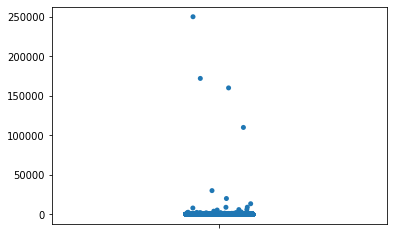

In [19]:
sns.stripplot(x=data[['CIRCONFERENCE (cm)']], orient='v')

* Quelques données semblent avoir des circonférences anormales
  * des circonférences ont l'air bien trop élevées
  * des circonférences sont égales à 0
  

* Si la valeur est proche de 0 nous pouvons considérer qu'elle est juste


* À noter : le conifère Taxodium mucronatum est l'arbre le plus gros du monde avec 50 mètres de circonférence au sol et 34.50m à 1m50 du sol.
  * À minima nous pouvons partir du principe que toute circonference au-delà de cette valeur est anormale
  * [Ce que ça donne en vrai](https://scontent-cdg2-1.xx.fbcdn.net/v/t1.0-9/69862665_1104919109697608_4295910582487351296_o.jpg?_nc_cat=102&_nc_sid=8024bb&_nc_ohc=daP98v15geMAX9ydgz-&_nc_ht=scontent-cdg2-1.xx&oh=7d490189780f044e08d8adab0e38ba48&oe=5F09B800)
  * Le plus grand arbre de France à une circonférence de 370 cm
  * Sans trop de risques, nous pouvons estimer qu'une circonférence au delà de 1500 est anormale

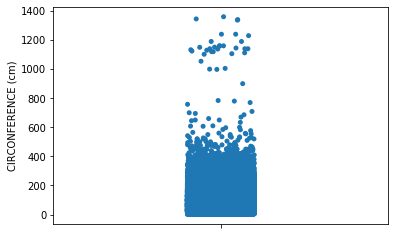

In [20]:
# données sans valeurs anormales
clean_data_circ = data[~(data['CIRCONFERENCE (cm)'] > 1500)]
clean_data_circ = clean_data_circ[~(clean_data_circ['CIRCONFERENCE (cm)'] == 0)]

sns.stripplot(x='CIRCONFERENCE (cm)', data=clean_data_circ, orient='v')

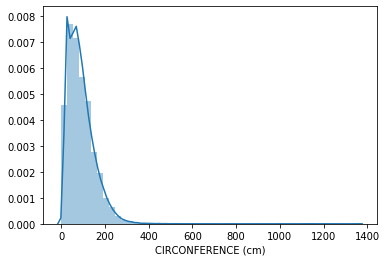

In [21]:
sns.distplot(clean_data_circ['CIRCONFERENCE (cm)'])

* La plupart des circonférences sont entre 0 et 500 cm

>

* **Que faire des données ?** : 
  * une analyse plus poussée doit être faite pour les valeurs égales à 0 : (voir plus bas)
    * combien y'en-a-t-il dans le dataset ?
      * s'il y en a peu, nous pouvons les supprimer
      * sinon, il faudra les modifier intelligemment en croisant avec 
        * la hauteur
        * le stade de developpement
        * le libelle français et l'espece
  * pour les valeurs anormalement grandes
     * supprimer les lignes

#### HAUTEUR (m)

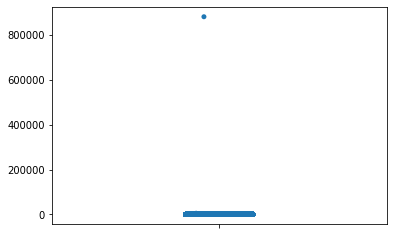

In [22]:
sns.stripplot(x=data[['HAUTEUR (m)']], orient='v')

* Quelques données semblent avoir des hauteurs anormales
  * des hauteurs ont l'air bien trop élevées
  * des hauteurs sont égales à 0 

>

* À noter que l'arbre le plus grand de France mesure 67 mètres
  * À minima nous pouvons partir du principe que toute hauteur au-delà de cette valeur est anormale

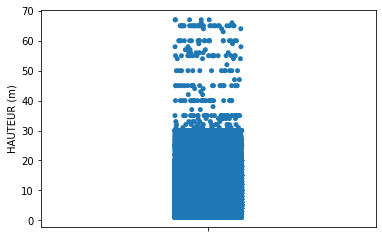

In [23]:
clean_data_haut = data[~(data['HAUTEUR (m)'] > 67)]
clean_data_haut = clean_data_haut[~(clean_data_haut['HAUTEUR (m)'] == 0)]
sns.stripplot(x="HAUTEUR (m)", data=clean_data_haut, orient='v')

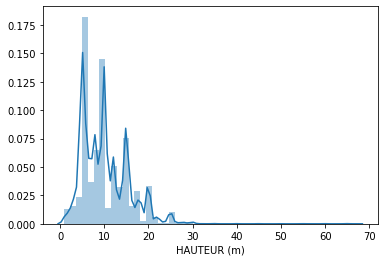

In [24]:
sns.distplot(clean_data_haut['HAUTEUR (m)'])

* La plupart des données se situent entre 0 et 35 mètres

>

* **Que faire des données ?** : 
  * pour les valeurs égales à 0 : même réponse que pour la circonférence (voir plus bas)
  * pour les valeurs anormalement grandes (z-score)
     * supprimer les lignes

> ### - Supprimer les données anormales

#### CIRCONFERENCE (cm)

In [25]:
# éliminer les valeurs vraiment très aberrantes
data_circ = data[(data['CIRCONFERENCE (cm)'] > 1500)]

nbr_circ_anor_suppr = len(data_circ)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", nbr_circ_anor_suppr)

data = data.drop(data_circ.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['CIRCONFERENCE (cm)'] > 1500)]))

>>> AVANT SUPPR - nombre de lignes aberrantes: 26
>>> APRES SUPPR - nombre de lignes aberrantes: 0


In [26]:
# on filtre les données sans valeurs égales à 0 car elles modifieraient trop la moyenne étant très nombreuses
# on complétera ces données dans un second temps, plutôt que de les supprimer
clean_data_circ = data[~(data['CIRCONFERENCE (cm)'] == 0)]

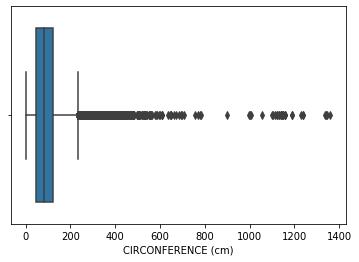

In [27]:
sns.boxplot(x=clean_data_circ['CIRCONFERENCE (cm)'])

* Toutes les valeurs au dessus de 250cm semblent aberrantes

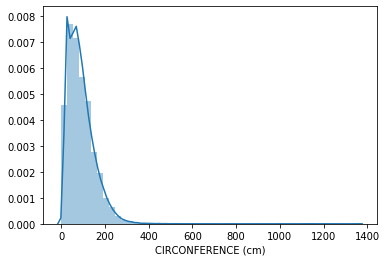

In [28]:
sns.distplot(clean_data_circ['CIRCONFERENCE (cm)'])

* On remarque que les données forment une pseudo distribution normale
* Nous pouvons utiliser la méthode des intervalles interquatile pour filtrer les données aberrantes
* 99,3% des données sont comprises entre \[Q1-\(1.5\*IQR\) ; Q3+\(1.5\*IQR\)\]
* les 0.7% restantes sont considérées comme aberrantes
* en revanche notre courbe est très resserée, nous pouvons augmenter la borne max afin de ne pas exclure des arbres potentiellement larges

In [29]:
# calcul des valeurs utiles
mediane = clean_data_circ['CIRCONFERENCE (cm)'].median()
Q1 = clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] < mediane]['CIRCONFERENCE (cm)'].median()
Q3 = clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] > mediane]['CIRCONFERENCE (cm)'].median()
IQR = Q3 - Q1
ecart = 3
high_outliers = Q3+(ecart*IQR)
low_outliers = Q1-(ecart*IQR) if Q1-(ecart*IQR) > 0 else 0

print(">>> mediane:" , mediane)
print(">>> Q1:" , Q1)
print("\t>>> n plus petits élements:", len(clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] < mediane]['CIRCONFERENCE (cm)']))
print(">>> Q3:", Q3)
print("\t>>> n plus grands élements:", len(clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] < mediane]['CIRCONFERENCE (cm)']))
print(">>> IQR:", IQR)
print(">>> Q3+({}*IQR): {}".format(ecart, high_outliers))
print(">>> Q1-({}*IQR): {}".format(ecart, low_outliers))


>>> mediane: 80.0
>>> Q1: 45.0
	>>> n plus petits élements: 89574
>>> Q3: 125.0
	>>> n plus grands élements: 89574
>>> IQR: 80.0
>>> Q3+(3*IQR): 365.0
>>> Q1-(3*IQR): 0


In [30]:
# suppression des high_outliers
data_high_outliers = clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] > high_outliers]

nbr_circ_anor_suppr = nbr_circ_anor_suppr + len(data_high_outliers)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", len(data_high_outliers))

data = data.drop(data_high_outliers.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['CIRCONFERENCE (cm)'] > high_outliers)]))

>>> AVANT SUPPR - nombre de lignes aberrantes: 329
>>> APRES SUPPR - nombre de lignes aberrantes: 0


In [31]:
# suppression des low_outliers
data_low_outliers = clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] < low_outliers]

nbr_circ_anor_suppr = nbr_circ_anor_suppr + len(data_low_outliers)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", len(data_low_outliers))

data = data.drop(data_low_outliers.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['CIRCONFERENCE (cm)'] < low_outliers)]))

>>> AVANT SUPPR - nombre de lignes aberrantes: 0
>>> APRES SUPPR - nombre de lignes aberrantes: 0


#### HAUTEUR (m)

In [32]:
# éliminer les valeurs vraiment très aberrantes
data_haut = data[(data['HAUTEUR (m)'] > 67)]

nbr_haut_anor_suppr = len(data_haut)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", nbr_haut_anor_suppr)

data = data.drop(data_haut.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['HAUTEUR (m)'] > 67)]))

>>> AVANT SUPPR - nombre de lignes aberrantes: 349
>>> APRES SUPPR - nombre de lignes aberrantes: 0


In [33]:
# on filtre les données sans valeurs égales à 0 car elles modifieraient trop la moyenne étant très nombreuses
# on complétera ces données dans un second temps, plutôt que de les supprimer
clean_data_haut= data[~(data['HAUTEUR (m)'] == 0)]

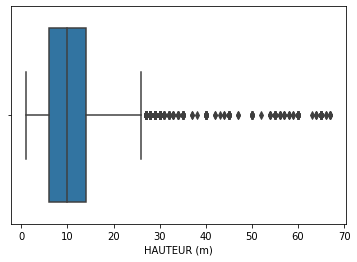

In [34]:
sns.boxplot(x=clean_data_haut['HAUTEUR (m)'])

* Toutes les valeurs au dessus de 27m semblent aberrantes

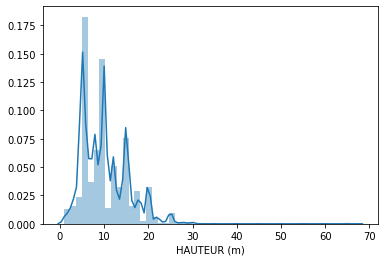

In [35]:
sns.distplot(clean_data_haut['HAUTEUR (m)'])

* Gros mailles, on remarque que les données forment une pseudo distribution normale
* Nous pouvons utiliser la méthode des intervalles interquatile pour filtrer les données aberrantes
* 99,3% des données sont comprises entre \[Q1-\(1.5\*IQR\) ; Q3+\(1.5\*IQR\)\]
* les 0.7% restantes sont considérées comme aberrantes

In [36]:
# calcul des valeurs utiles
mediane = clean_data_haut['HAUTEUR (m)'].median()
Q1 = clean_data_haut[clean_data_haut['HAUTEUR (m)'] < mediane]['HAUTEUR (m)'].median()
Q3 = clean_data_haut[clean_data_haut['HAUTEUR (m)'] > mediane]['HAUTEUR (m)'].median()
IQR = Q3 - Q1
ecart = 1.5
high_outliers = Q3+(ecart*IQR)
low_outliers = Q1-(ecart*IQR) if Q1-(ecart*IQR) > 0 else 0

print(">>> mediane:" , mediane)
print(">>> Q1:" , Q1)
print("\t>>> n plus petits élements:", len(clean_data_haut[clean_data_haut['HAUTEUR (m)'] < mediane]['HAUTEUR (m)']))
print(">>> Q3:", Q3)
print("\t>>> n plus grands élements:", len(clean_data_haut[clean_data_haut['HAUTEUR (m)'] < mediane]['HAUTEUR (m)']))
print(">>> IQR:", IQR)
print(">>> Q3+({}*IQR): {}".format(ecart, high_outliers))
print(">>> Q1-({}*IQR): {}".format(ecart, low_outliers))

>>> mediane: 10.0
>>> Q1: 5.0
	>>> n plus petits élements: 82114
>>> Q3: 15.0
	>>> n plus grands élements: 82114
>>> IQR: 10.0
>>> Q3+(1.5*IQR): 30.0
>>> Q1-(1.5*IQR): 0


In [37]:
# suppression des high_outliers
data_high_outliers = clean_data_haut[clean_data_haut['HAUTEUR (m)'] > high_outliers]

nbr_haut_anor_suppr = nbr_haut_anor_suppr + len(data_high_outliers)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", len(data_high_outliers))

data = data.drop(data_high_outliers.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['HAUTEUR (m)'] > high_outliers)]))


>>> AVANT SUPPR - nombre de lignes aberrantes: 208
>>> APRES SUPPR - nombre de lignes aberrantes: 0


>>> AVANT SUPPR - nombre de lignes aberrantes: 0
>>> APRES SUPPR - nombre de lignes aberrantes: 0


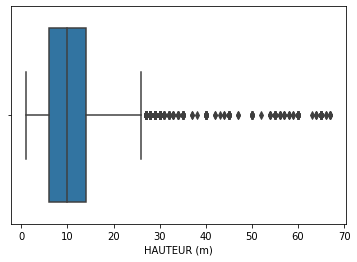

In [38]:
# suppression des low_outliers
data_low_outliers = clean_data_haut[clean_data_haut['HAUTEUR (m)'] < low_outliers]

nbr_haut_anor_suppr = nbr_haut_anor_suppr + len(data_low_outliers)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", len(data_low_outliers))

data = data.drop(data_low_outliers.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['HAUTEUR (m)'] < low_outliers)]))
sns.boxplot(x=clean_data_haut['HAUTEUR (m)'])

## - Compléter les données manquantes (y.c celles égales à 0)
---

> ### - Complétion de la colonne LIBELLE FRANCAIS

In [39]:
print("nombre de libellés français vide", len(data[(data['LIBELLE FRANCAIS'].isna())]))

nombre de libellés français vide 727


>> #### complétion avec le GENRE

In [40]:
# tous les libellés français vides qui ont un genre défini
save = data_save
emptylibfr_genre = save[(save['LIBELLE FRANCAIS'].isna()) & ~(save['GENRE'] == 'Non spécifié') & ~(save['GENRE'].isna())]
print(">>> nombre de libelle français vide ayant un genre non vide:", len(emptylibfr_genre))

>>> nombre de libelle français vide ayant un genre non vide: 601


In [41]:
# nombre de modifications
count_modif = 0
count_non_modif = 0

# pour chaque genre ayant un libelle fr vide
for genre in emptylibfr_genre["GENRE"].unique():
    
    # liste des remplacents (non vides) possibles pour ce genre
    liste_remplacents = save[(save['GENRE'] == genre)]['LIBELLE FRANCAIS'].dropna().unique()
    
    # s'il y a un seul remplacent on modifie le libelle fr de chaque index correspondant à ce genre
    if (len(liste_remplacents) == 1):
        print(">>> (== 1) - genre :", genre, ">>>",  liste_remplacents[0])
        for index in emptylibfr_genre[emptylibfr_genre['GENRE']==genre].index:
            data.loc[index,'LIBELLE FRANCAIS'] = liste_remplacents[0]
            count_modif +=1
            
    # s'il y a plusieurs remplacents, on ne fait rien
    elif (len(liste_remplacents) > 1):
        #print(">>> (> 1) - genre :", genre, ">>>",  liste_remplacents)
        for index in emptylibfr_genre[emptylibfr_genre['GENRE']==genre].index:
            count_non_modif +=1
    
    # si l'espece n'a pas de correspondance ou si elle en a trop car trop générique (n. sp.), on ne fait rien
    else:
        #print(">>> vide:", liste_remplacents)
        for index in emptylibfr_genre[emptylibfr_genre['GENRE']==genre].index:
            count_non_modif +=1
        
print()

nbr_libfr_comp = count_modif

if count_modif+count_non_modif == len(emptylibfr_genre):
    print('>>> OK :)')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\t>>> nombre de libelle français vides ayant un genre non vide:", len(emptylibfr_genre))
else:
    print('>>> KO !!')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\>>> nombre de libelle français vides ayant un genre non vide:", len(emptylibfr_genre))

>>> (== 1) - genre : Quercus >>> Chêne
>>> (== 1) - genre : Juniperus >>> Genévrier
>>> (== 1) - genre : Taxus >>> If
>>> (== 1) - genre : Olea >>> Olivier
>>> (== 1) - genre : Ulmus >>> Orme
>>> (== 1) - genre : Acer >>> Erable
>>> (== 1) - genre : Populus >>> Peuplier
>>> (== 1) - genre : Tilia >>> Tilleul
>>> (== 1) - genre : Eucalyptus >>> Eucalyptus
>>> (== 1) - genre : Picea >>> Epicéa
>>> (== 1) - genre : Pinus >>> Pin
>>> (== 1) - genre : Liriodendron >>> Tulipier
>>> (== 1) - genre : Celtis >>> Micocoulier
>>> (== 1) - genre : Cotoneaster >>> Cotoneaster
>>> (== 1) - genre : Paulownia >>> Paulownia
>>> (== 1) - genre : Chamaecyparis >>> Faux-cyprès
>>> (== 1) - genre : Platanus >>> Platane
>>> (== 1) - genre : Sophora >>> Sophora
>>> (== 1) - genre : Cornus >>> Cornouiller
>>> (== 1) - genre : Toona >>> Cedrele
>>> (== 1) - genre : Ehretia >>> Cabrillet
>>> (== 1) - genre : Trachycarpus >>> Palmier
>>> (== 1) - genre : Aesculus >>> Marronnier
>>> (== 1) - genre : Salix >>> Sau

In [42]:
print("nombre de libellés français vide", len(data[(data['LIBELLE FRANCAIS'].isna())]))

nombre de libellés français vide 354


>> #### complétion avec l'ESPECE

In [43]:
# tous les libellés français vides qui ont une espèce définie
emptylibfr_espece = data[(data['LIBELLE FRANCAIS'].isna()) & ~(data['ESPECE'].isna())]
print(">>> nombre de libelle français vide ayant une espece non vide:", len(emptylibfr_espece))

>>> nombre de libelle français vide ayant une espece non vide: 117


In [44]:
# nombre de modifications
count_modif = 0
count_non_modif = 0

# pour chaque espece ayant un libelle fr vide
for espece in emptylibfr_espece["ESPECE"].unique():
    
    # liste des remplacents possibles pour cette espece
    liste_remplacents = data[(data['ESPECE'] == espece)]['LIBELLE FRANCAIS'].dropna().unique()
    
    # s'il y a un seul remplacent on modifie le libelle fr de chaque index correspondant à cette espece
    if (espece != 'n. sp.') & (len(liste_remplacents) == 1):
        print(">>> (== 1) - espece :", espece, ">>>",  liste_remplacents[0])
        for index in emptylibfr_espece[emptylibfr_espece['ESPECE']==espece].index:
            data.loc[index,'LIBELLE FRANCAIS'] = liste_remplacents[0]
            count_modif +=1
    
    # s'il y a plusieurs remplacents, on ne fait rien
    elif (espece != 'n. sp.') & (len(liste_remplacents) > 1):
        #print(">>> (> 1) - espece :", espece, ">>>",  liste_remplacents)
        for index in emptylibfr_espece[emptylibfr_espece['ESPECE']==espece].index:
            count_non_modif +=1
        
    # si l'espece n'a pas de correspondance ou si elle en a trop car trop générique (n. sp.), on ne fait rien
    else:
        #print(">>> vide ou n. sp.")
        for index in emptylibfr_espece[emptylibfr_espece['ESPECE']==espece].index:
            count_non_modif +=1
            
print()

nbr_libfr_comp = nbr_libfr_comp + count_modif

if count_modif+count_non_modif == len(emptylibfr_espece):
    print('>>> OK :)')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\t>>> nombre de libelle français vides ayant un genre non vide:", len(emptylibfr_espece))
else:
    print('>>> KO !!')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\>>> nombre de libelle français vides ayant un genre non vide:", len(emptylibfr_espece))

>>> (== 1) - espece : pyrifolia >>> Poirier à fruits
>>> (== 1) - espece : cerasifera >>> Prunier à fleurs
>>> (== 1) - espece : x subhirtella >>> Cerisier à fleurs
>>> (== 1) - espece : x hillieri >>> Cerisier à fleurs
>>> (== 1) - espece : floribunda >>> Pommier à fleurs
>>> (== 1) - espece : baccata var. mandshurica >>> Pommier à fleurs
>>> (== 1) - espece : padus >>> Cerisier à grappes
>>> (== 1) - espece : torminalis >>> Alisier
>>> (== 1) - espece : sinense >>> Troene
>>> (== 1) - espece : maxima >>> Noisetier
>>> (== 1) - espece : x robusta >>> Pommier à fleurs

>>> OK :)
	>>> nombre de modifications effectuées: 32
	>>> nombre de données non modifiées : 85
	>>> nombre de libelle français vides ayant un genre non vide: 117


In [45]:
print("nombre de libellés français vide", len(data[(data['LIBELLE FRANCAIS'].isna())]))   

nombre de libellés français vide 322


>> #### suppression des derniers LIBELLE FRANCAIS vides

In [46]:
nbr_libfr_suppr = len(data[(data['LIBELLE FRANCAIS'].isna())])

print("AVANT SUPPR - nombre de LIBELLE FRANCAIS encore vides:", len(data[(data['LIBELLE FRANCAIS'].isna())]))
data = data.drop(data[(data['LIBELLE FRANCAIS'].isna())].index)
print("APRES SUPPR - nombre de LIBELLE FRANCAIS encore vides:", len(data[(data['LIBELLE FRANCAIS'].isna())]))

AVANT SUPPR - nombre de LIBELLE FRANCAIS encore vides: 322
APRES SUPPR - nombre de LIBELLE FRANCAIS encore vides: 0


> ### - Complétion de la colonne ESPECE

In [47]:
print("nombre de ESPECE vide", len(data[(data['ESPECE'].isna())]))

nombre de ESPECE vide 1850


>> #### complétion avec le GENRE

In [48]:
# toutes les ESPECEs vides qui ont un GENRE défini
save = data_save
emptyespece_genre = save[(save['ESPECE'].isna()) & ~(save['GENRE'] == 'Non spécifié') & ~(save['GENRE'].isna())]
print(">>> nombre de ESPECE vide ayant un GENRE non vide:", len(emptyespece_genre))

>>> nombre de ESPECE vide ayant un GENRE non vide: 1962


In [49]:
# nombre de modifications
count_modif = 0
count_non_modif = 0

# pour chaque genre ayant un libelle fr vide
for genre in emptyespece_genre["GENRE"].unique():
    
    # liste des remplacents (non vides) possibles pour ce genre
    liste_remplacents = save[(save['GENRE'] == genre)]['ESPECE'].dropna().unique()
    
    # s'il y a un seul remplacent on modifie le libelle fr de chaque index correspondant à ce genre
    if (len(liste_remplacents) == 1):
        print(">>> (== 1) - genre :", genre, ">>>",  liste_remplacents[0])
        for index in emptyespece_genre[emptyespece_genre['GENRE']==genre].index:
            data.loc[index,'ESPECE'] = liste_remplacents[0]
            count_modif +=1
            
    # s'il y a plusieurs remplacents, on ne fait rien
    elif (len(liste_remplacents) > 1):
        #print(">>> (> 1) - genre :", genre, ">>>",  liste_remplacents)
        for index in emptyespece_genre[emptyespece_genre['GENRE']==genre].index:
            count_non_modif +=1
    
    # si l'espece n'a pas de correspondance ou si elle en a trop car trop générique (n. sp.), on ne fait rien
    else:
        #print(">>> vide:", liste_remplacents)
        for index in emptyespece_genre[emptyespece_genre['GENRE']==genre].index:
            count_non_modif +=1
        
print()

nbr_espece_comp = count_modif

if count_modif+count_non_modif == len(emptyespece_genre):
    print('>>> OK :)')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\t>>> nombre de libelle français vides ayant un genre non vide:", len(emptyespece_genre))
else:
    print('>>> KO !!')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\>>> nombre de libelle français vides ayant un genre non vide:", len(emptyespece_genre))

>>> (== 1) - genre : Liriodendron >>> tulipifera
>>> (== 1) - genre : x Chitalpa >>> tashkentensis
>>> (== 1) - genre : Styrax >>> japonicus
>>> (== 1) - genre : Platycladus >>> orientalis
>>> (== 1) - genre : Cydonia >>> oblonga
>>> (== 1) - genre : Parrotia >>> persica

>>> OK :)
	>>> nombre de modifications effectuées: 8
	>>> nombre de données non modifiées : 1954
	>>> nombre de libelle français vides ayant un genre non vide: 1962


In [50]:
print("nombre de ESPECE vide", len(data[(data['ESPECE'].isna())]))

nombre de ESPECE vide 1843


>> #### complétion avec le LIBELLE FRANCAIS

In [51]:
# toutes les ESPECEs vides qui ont un LIBELLE FRANCAIS défini
emptyespece_libfr = data[(data['ESPECE'].isna()) & ~(data['LIBELLE FRANCAIS'].isna())]
print(">>> nombre de ESPECE ayant un LIBELLE FRANCAIS non vide:", len(emptyespece_libfr))

>>> nombre de ESPECE ayant un LIBELLE FRANCAIS non vide: 1843


In [52]:
# nombre de modifications
count_modif = 0
count_non_modif = 0

# pour chaque LIBELLE FRANCAIS ayant une ESPECE vide
for libfr in emptyespece_libfr["LIBELLE FRANCAIS"].unique():
    
    # liste des remplacents possibles pour ce LIBELLE FRANCAIS
    liste_remplacents = data[(data['LIBELLE FRANCAIS'] == libfr)]['ESPECE'].dropna().unique()
    
    # s'il y a un seul remplacent on modifie le libelle fr de chaque index correspondant à cette espece
    if (len(liste_remplacents) == 1):
        print(">>> (== 1) - libfr :", libfr, ">>>",  liste_remplacents[0])
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            data.loc[index,'ESPECE'] = liste_remplacents[0]
            count_modif +=1
    
    # s'il y a plusieurs remplacents, on ne fait rien
    elif (len(liste_remplacents) > 1):
        #print(">>> (> 1) - libfr :", libfr, ">>>",  liste_remplacents)
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            count_non_modif +=1
        
    # si le LIBELLE FRANCAIS n'a pas de correspondance, on ne fait rien
    else:
        #print(">>> vide ou n. sp.")
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            count_non_modif +=1
            
print()

nbr_espece_comp = nbr_espece_comp + count_modif

if count_modif+count_non_modif == len(emptyespece_libfr):
    print('>>> OK :)')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\t>>> nombre de libelle français vides ayant un genre non vide:", len(emptyespece_libfr))
else:
    print('>>> KO !!')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\>>> nombre de libelle français vides ayant un genre non vide:", len(emptyespece_libfr))


>>> OK :)
	>>> nombre de modifications effectuées: 0
	>>> nombre de données non modifiées : 1843
	>>> nombre de libelle français vides ayant un genre non vide: 1843


In [53]:
print("nombre de ESPECE vide", len(data[(data['ESPECE'].isna())]))   

nombre de ESPECE vide 1843


#### analyse des données ESPECE - pourquoi si peu de modifications ?

In [54]:
sub_data = data[['LIBELLE FRANCAIS','ESPECE']]
pivot = pd.pivot_table(sub_data, index=['LIBELLE FRANCAIS'], aggfunc=lambda x: len(x.unique()))

print(">>> nombre de libelle francais ayant une seule espece:", 
      len(pivot[pivot['ESPECE'] == 1]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] == 1])/len(pivot),2)*100,
      "%"
     )

#

print(">>> nombre de libelle francais ayant + de 1 espece:", 
      len(pivot[pivot['ESPECE'] > 1]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] > 1])/len(pivot),2)*100,
      "%"
     )

#

print(">>> nombre de libelle francais ayant + de 5 especes:", 
      len(pivot[pivot['ESPECE'] > 5]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] > 5])/len(pivot),2)*100,
      "%"
     )

#

print(">>> nombre de libelle francais ayant + de 10 especes:", 
      len(pivot[pivot['ESPECE'] > 10]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] > 10])/len(pivot),2)*100,
      "%"
     )

#

print(">>> nombre de libelle francais ayant + de 20 especes:", 
      len(pivot[pivot['ESPECE'] > 20]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] > 20])/len(pivot),2)*100,
      "%"
     )

#

print(">>> nombre de libelle francais ayant + de 50 especes:", 
      len(pivot[pivot['ESPECE'] > 50]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] > 50])/len(pivot),2)*100,
      "%"
     )


>>> nombre de libelle francais ayant une seule espece: 85 soit: 44.0 %
>>> nombre de libelle francais ayant + de 1 espece: 107 soit: 56.00000000000001 %
>>> nombre de libelle francais ayant + de 5 especes: 34 soit: 18.0 %
>>> nombre de libelle francais ayant + de 10 especes: 17 soit: 9.0 %
>>> nombre de libelle francais ayant + de 20 especes: 5 soit: 3.0 %
>>> nombre de libelle francais ayant + de 50 especes: 0 soit: 0.0 %


* Plus de la moitié des LIBELLE FRANCAIS ont plus de 1 espèces associées et 20% en ont plus de 5

In [55]:
# détail quand il y a plus d'une espece
for index in pivot[pivot['ESPECE'] > 20].index:
    print(">>>", index)
    print(data[data['LIBELLE FRANCAIS'] == index]['ESPECE'].value_counts())
    print()
                 

>>> Bouleau
pendula                      1465
utilis                        462
n. sp.                        216
papyrifera                     72
nigra                          65
pubescens                      55
albosinensis                   18
populifolia                    18
pendula var. pendula           11
ermanii                         8
maximowicziana                  5
davurica                        4
alleghaniensis                  3
lenta                           3
x caerulea                      2
medwediewii                     2
luminifera                      1
delavayi subsp. potaninii       1
forrestii                       1
nana                            1
platyphylla                     1
Name: ESPECE, dtype: int64

>>> Cerisier à fleurs
serrulata        2424
x subhirtella     418
avium             320
serrula           178
maackii           126
x schmittii       123
x hillieri         70
sargentii          68
x yedoensis        39
mahaleb            23
x bl

* On remarque que pour une LIBELLE FRANCAIS donné, il y a toujours une ESPECE qui ressort nettement
* Nous pouvons utiliser cette ESPECE comme référence pour un LIBELLE FRANCAIS donné
* On enlève l'espèce générique 'n. sp.'

#### complétion des données ESPECE

In [56]:
# nombre de modifications
count_modif = 0
count_non_modif = 0

# pour chaque LIBELLE FRANCAIS ayant une ESPECE vide
for libfr in emptyespece_libfr["LIBELLE FRANCAIS"].unique():
    
    # liste des remplacents possibles pour ce LIBELLE FRANCAIS
    liste_remplacents = data[(data['LIBELLE FRANCAIS'] == libfr)]['ESPECE'].dropna().unique()
    liste_remplacents_count = data[(data['LIBELLE FRANCAIS'] == libfr)]['ESPECE'].dropna().value_counts()
    
    # s'il y a un seul remplacent on modifie le libelle fr de chaque index correspondant à cette espece
    if (len(liste_remplacents) == 1):
        #print(">>> (== 1) - libfr :", libfr, ">>>",  liste_remplacents[0])
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            data.loc[index,'ESPECE'] = liste_remplacents[0]
            count_modif +=1
    
    # s'il y a plusieurs remplacents, on prend celui ayant le plus d'occurences hors n. sp.
    elif (len(liste_remplacents) > 1):
        print(">>> (> 1) - libfr :", libfr, ">>>",  liste_remplacents_count[liste_remplacents_count.index != 'n. sp.'].idxmax())
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            data.loc[index,'ESPECE'] = liste_remplacents_count[liste_remplacents_count.index != 'n. sp.'].idxmax()
            count_modif +=1
            
    # si le LIBELLE FRANCAIS n'a pas de correspondance, on ne fait rien
    else:
        #print(">>> vide ou n. sp.")
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            count_non_modif +=1

print()

nbr_espece_comp = nbr_espece_comp + count_modif

if count_modif+count_non_modif == len(emptyespece_libfr):
    print('>>> OK :)')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\t>>> nombre de libelle français vides ayant un genre non vide:", len(emptyespece_libfr))
else:
    print('>>> KO !!')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\>>> nombre de libelle français vides ayant un genre non vide:", len(emptyespece_libfr))

>>> (> 1) - libfr : Orme >>> minor
>>> (> 1) - libfr : Cerisier à fleurs >>> serrulata
>>> (> 1) - libfr : Chêne >>> robur
>>> (> 1) - libfr : Pommier à fleurs >>> tschonoskii
>>> (> 1) - libfr : Amélanchier >>> lamarckii
>>> (> 1) - libfr : Erable >>> pseudoplatanus
>>> (> 1) - libfr : Peuplier >>> nigra
>>> (> 1) - libfr : Tilleul >>> tomentosa
>>> (> 1) - libfr : Eucalyptus >>> gunnii
>>> (> 1) - libfr : Micocoulier >>> australis
>>> (> 1) - libfr : Paulownia >>> tomentosa
>>> (> 1) - libfr : Platane >>> x hispanica
>>> (> 1) - libfr : Sophora >>> japonica
>>> (> 1) - libfr : Cornouiller >>> mas
>>> (> 1) - libfr : Cedrele >>> sinensis
>>> (> 1) - libfr : If >>> baccata
>>> (> 1) - libfr : Pin >>> nigra
>>> (> 1) - libfr : Palmier >>> fortunei
>>> (> 1) - libfr : Marronnier >>> hippocastanum
>>> (> 1) - libfr : Pommier à fruits >>> domestica
>>> (> 1) - libfr : Pterocarya >>> fraxinifolia
>>> (> 1) - libfr : Mûrier >>> alba
>>> (> 1) - libfr : Charme >>> betulus
>>> (> 1) - libfr : 

In [57]:
print("nombre de ESPECE vide", len(data[(data['ESPECE'].isna())]))   

nombre de ESPECE vide 1


>> #### suppression des dernières ESPECEs vides

In [58]:
nbr_espece_suppr = len(data[(data['ESPECE'].isna())])

print("AVANT SUPPR - nombre de ESPECEs encore vides:", len(data[(data['ESPECE'].isna())]))
data = data.drop(data[(data['ESPECE'].isna())].index)
print("APRES SUPPR - nombre de ESPECEs encore vides:", len(data[(data['ESPECE'].isna())]))

AVANT SUPPR - nombre de ESPECEs encore vides: 1
APRES SUPPR - nombre de ESPECEs encore vides: 0


> ### - Remplacer les valeurs égales à 0 pour CIRCONFERENCE (cm) et HAUTEUR (m)

#### Analyse des circonférences et hauteurs égales à 0

In [59]:
# nombre de circonférences égales à 0
nbr_zero = (data['CIRCONFERENCE (cm)'] == 0).value_counts()
print('>>> nombre de circonférences égales à 0')
print(nbr_zero)

print()

print('>>> soit :',  round(nbr_zero[True]/len(data)*100,2), "%")

>>> nombre de circonférences égales à 0
False    181086
True      22982
Name: CIRCONFERENCE (cm), dtype: int64

>>> soit : 11.26 %


In [60]:
# nombre de hauteurs égales à 0
nbr_zero = (data['HAUTEUR (m)'] == 0).value_counts()
print('>>> nombre de hauteurs égales à 0')
print(nbr_zero)

print()

print('>>> soit :',  round(nbr_zero[True]/len(data)*100,2), "%")

>>> nombre de hauteurs égales à 0
False    172304
True      31764
Name: HAUTEUR (m), dtype: int64

>>> soit : 15.57 %


* Nous ne pouvons pas simplement supprimer les données car il y a trop de données dans le dataset égales à 0

In [61]:
# nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0
nbr_double_zero = len(data[(data['CIRCONFERENCE (cm)'] == 0) & (data['HAUTEUR (m)'] == 0)])
print('>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0:',nbr_double_zero)

print(">>> soit:", 
        round(
            nbr_double_zero
            /
            len(data[(data['CIRCONFERENCE (cm)'] == 0)])*100
        ,2), "% des lignes ayant CIRCONFERENCE = 0")

print(">>> soit:", 
        round(
            nbr_double_zero
            /
            len(data[(data['HAUTEUR (m)'] == 0)])*100
        ,2), "% des lignes ayant HAUTEUR = 0")

>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0: 22709
>>> soit: 98.81 % des lignes ayant CIRCONFERENCE = 0
>>> soit: 71.49 % des lignes ayant HAUTEUR = 0


* Pour la CIRCONFERENCE nous ne pouvons pas utiliser la HAUTEUR dans 99% des cas
* En revanche, pour la HAUTEUR nous pourrions utiliser la CIRCONFERENCE dans 28% des cas
* Nous pouvons utiliser d'autres données pour établir une corrélation entre HAUTEUR & CIRCONFERENCE, telles que:
  * STADE DE DEVELOPPEMENT
  * LIBELLE FRANCAIS / ESPECE 

In [62]:
# nombre de STADE DE DEVELOPPEMENT vides quand CIRCONFERENCE = 0 et HAUTEUR = 0
temp = data[
            (data['CIRCONFERENCE (cm)'] == 0) &
            (data['HAUTEUR (m)'] == 0) &
            (data['STADE DE DEVELOPPEMENT'].isna())
           ]

print('>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et STADE DE DEVELOPPEMENT vide:', len(temp))

print(">>> soit:", 
        round(
            len(temp)
            /
            len(data[(data['CIRCONFERENCE (cm)'] == 0) & (data['HAUTEUR (m)'] == 0)])*100
        ,2), "%")

>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et STADE DE DEVELOPPEMENT vide: 22406
>>> soit: 98.67 %


* Le stade de développement ne peut pas être utilisé pour déduire la circonférence ou la hauteur
  * cette donnée n'est pas renseigné quand CIRCONFERENCE = 0 et HAUTEUR = 0 (ce qui semble logique)
* Reste le LIBELLE FRANCAIS et l'ESPECE

In [63]:
# nombre de LIBELLE FRANCAIS vides quand CIRCONFERENCE = 0 et HAUTEUR = 0
temp = data[
            (data['CIRCONFERENCE (cm)'] == 0) &
            (data['HAUTEUR (m)'] == 0) &
            (data['LIBELLE FRANCAIS'].isna())
           ]

print('>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et LIBELLE FRANCAIS vide:', len(temp))

print(">>> soit:", 
        round(
            len(temp)
            /
            len(data[(data['CIRCONFERENCE (cm)'] == 0) & (data['HAUTEUR (m)'] == 0)])*100
        ,2), "%")

>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et LIBELLE FRANCAIS vide: 0
>>> soit: 0.0 %


In [64]:
# nombre de ESPECE vides quand CIRCONFERENCE = 0 et HAUTEUR = 0
temp = data[
            (data['CIRCONFERENCE (cm)'] == 0) &
            (data['HAUTEUR (m)'] == 0) &
            (data['ESPECE'].isna())
           ]

print('>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et ESPECE vide:', len(temp))

print(">>> soit:", 
        round(
            len(temp)
            /
            len(data[(data['CIRCONFERENCE (cm)'] == 0) & (data['HAUTEUR (m)'] == 0)])*100
        ,2), "%")

>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et ESPECE vide: 0
>>> soit: 0.0 %


* le LIBELLE FRANCAIS en conjonction avec l'ESPECE peuvent être utilisés

#### Remplacement grâce aux LIBELLE FRANCAIS et ESPECE

In [65]:
# liste des hauteurs et circonférences non nulles et des libelles francais
sub_data = data[
    ~(data['CIRCONFERENCE (cm)'] == 0) &
    ~(data['HAUTEUR (m)'] == 0) &
    ~(data['ESPECE'].isna()) &
    ~(data['LIBELLE FRANCAIS'].isna())
][['LIBELLE FRANCAIS', 'ESPECE', 'CIRCONFERENCE (cm)', 'HAUTEUR (m)']]

print(len(sub_data))
sub_data.head(5)

172030


,LIBELLE FRANCAIS,ESPECE,CIRCONFERENCE (cm),HAUTEUR (m)
0,Marronnier,x carnea,45.0,6.0
1,Frêne,excelsior,115.0,10.0
2,Chêne,rubra,60.0,10.0
4,Platane,x hispanica,180.0,18.0
5,Noisetier de Byzance,colurna,140.0,10.0


In [66]:
# la moyenne des hauteurs et circonférences par couple de LIBELLE FRANCAIS / ESPECE
pivot = pd.pivot_table(sub_data, index=['LIBELLE FRANCAIS', 'ESPECE'], aggfunc='mean')

pivot

CIRCONFERENCE (cm)  HAUTEUR (m)
LIBELLE FRANCAIS ESPECE                                        
Abelia           n. sp.                  20.000000     5.000000
                 triflora                75.000000     6.000000
Abricotier       armeniaca               15.708333     2.520833
Abricotier fruit armeniaca               10.000000     2.000000
Ailante          altissima              103.719118    10.797059
...                                            ...          ...
Viorne           odoratissimum           10.000000     1.000000
                 tinus                   30.000000     5.000000
Virgilier        kentukea                57.480000     5.320000
                 n. sp.                  95.000000     5.000000
                 sinensis                55.250000     5.625000

[595 rows x 2 columns]

In [67]:
# nombre de modifications 
count_modif = 0

# pour chaque couple libelle francais et espece
for lib_fr, espece in pivot.index:
    
    # on récupère tous les couples ayant CIRCONFERENCE = 0 et HAUTEUR = 0
    temp = data[
            (data['LIBELLE FRANCAIS'] == lib_fr) & 
            (data['ESPECE'] == espece) & 
            (data['CIRCONFERENCE (cm)'] == 0) &
            (data['HAUTEUR (m)'] == 0)
           ]

    # on modifie chaque index de ce couple par la moyenne des CIRCONFERENCE et HAUTEUR correspondante à ce couple
    if len(temp) !=0:
        data.loc[temp.index, 'CIRCONFERENCE (cm)'] = pivot.loc[lib_fr, espece]['CIRCONFERENCE (cm)']
        data.loc[temp.index, 'HAUTEUR (m)'] = pivot.loc[lib_fr,espece]['HAUTEUR (m)']
        count_modif = count_modif + len(temp)
        
nbr_circ_zero_comp = count_modif
nbr_haut_zero_comp = count_modif
print(">>> nombre de modifications :", count_modif)

>>> nombre de modifications : 22430


In [68]:
# nombre de circonférences égales à 0
nbr_zero = (data['CIRCONFERENCE (cm)'] == 0).value_counts()
print('>>> nombre de circonférences égales à 0')
print(nbr_zero)

print()

print('>>> soit :',  round(nbr_zero[True]/len(data)*100,2), "%")

>>> nombre de circonférences égales à 0
False    203516
True        552
Name: CIRCONFERENCE (cm), dtype: int64

>>> soit : 0.27 %


In [69]:
# suppression des circonférences égales à 0 restantes
nbr_circ_zero_suppr = len(data[data['CIRCONFERENCE (cm)'] == 0])

data = data.drop(data[data['CIRCONFERENCE (cm)'] == 0].index)

print(">>> nombre de données:", len(data))

>>> nombre de données: 203516


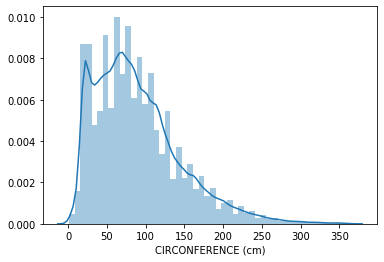

In [70]:
sns.distplot(data['CIRCONFERENCE (cm)'])

In [71]:
# nombre de hauteurs égales à 0
nbr_zero = (data['HAUTEUR (m)'] == 0).value_counts()
print('>>> nombre de hauteurs égales à 0')
print(nbr_zero)

print()

nbr_haut_zero_comp = nbr_haut_zero_comp + len(data[data['HAUTEUR (m)']==0])

print('>>> soit :',  round(nbr_zero[True]/len(data)*100,2), "%")

>>> nombre de hauteurs égales à 0
False    194461
True       9055
Name: HAUTEUR (m), dtype: int64

>>> soit : 4.45 %


* Il reste ~9k HAUTEURS à modifier, ce sont celles dont la CIRCONFERENCE n'étaient pas égales à 0

#### Remplacement de manière itérative (pour les HAUTEURs égales à 0 restantes)

In [72]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# suppression des deux lignes ajoutées de manière forfuite par la complétion utilisant les données save
data = data.drop(data[data['LIBELLE FRANCAIS'].isna()].index)
data = data.drop(data[data['CIRCONFERENCE (cm)'].isna()].index)
data = data.drop(data[data['HAUTEUR (m)'].isna()].index)

# on crée des ID équivalent aux colonnes LIBELLE FRANCAIS et ESPECE
data['LIBELLE FRANCAIS NBR'] = data['LIBELLE FRANCAIS'].astype("category").cat.codes
data['ESPECE NBR'] = data['ESPECE'].astype("category").cat.codes

# on récupère toutes les données HAUTEUR (y.c celle égale à 0) 
# ayant une CIRCONFERENCE != 0, un LIBELLE FRANCAIS et une ESPECE
temp = data[
    (data['CIRCONFERENCE (cm)'] != 0) & 
    ~(data['LIBELLE FRANCAIS NBR'] == -1) &
    ~(data['ESPECE NBR'] == -1)
][['LIBELLE FRANCAIS NBR', 'ESPECE NBR', 'CIRCONFERENCE (cm)','HAUTEUR (m)']]

print(">>> nombre de données - data :", len(data))
print(">>> nombre de données - temp :", len(temp))

imputer = IterativeImputer(missing_values=0, random_state=0)
imputed_data = imputer.fit_transform(temp.values)

temp2 = pd.DataFrame(imputed_data, index=temp.index, columns=temp.columns)
data['HAUTEUR (m)'] = temp2['HAUTEUR (m)']


>>> nombre de données - data : 203514
>>> nombre de données - temp : 203514


In [73]:
# nombre de hauteurs égales à 0
nbr_zero = (data['HAUTEUR (m)'] == 0).value_counts()
print('>>> nombre de hauteurs égales à 0')
print(nbr_zero)

>>> nombre de hauteurs égales à 0
False    203514
Name: HAUTEUR (m), dtype: int64


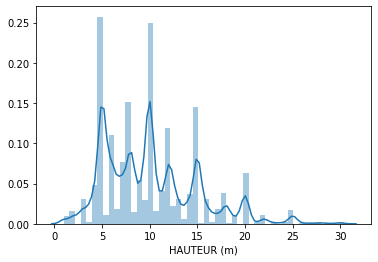

In [74]:
sns.distplot(data['HAUTEUR (m)'])

> ### - Complétion de la colonne STADE DE DEVELOPPEMENT

In [75]:
from sklearn.linear_model import SGDClassifier

# données de référence
temp = data[['CIRCONFERENCE (cm)','HAUTEUR (m)', 'STADE DE DEVELOPPEMENT']].dropna()

# taille du jeu de données
test_size = len(temp) - 10_000

# test_size dernières lignes
X_train = temp[['CIRCONFERENCE (cm)','HAUTEUR (m)']][-test_size:] 
y_train = temp['STADE DE DEVELOPPEMENT'][-test_size:]

# entrainement du modèle
clf = SGDClassifier(loss="hinge", penalty="l1", max_iter=10000)
clf.fit(X_train, y_train)

print(">>> nombre de données non vides:", len(temp))
print(">>> taille du jeu de données pour entrainement du modèle:", test_size)


>>> nombre de données non vides: 147016
>>> taille du jeu de données pour entrainement du modèle: 137016


In [76]:
# d'autres cas qui n'ont pas servis à entraîner le modèle
test_size = 10_000
X_test = temp[['CIRCONFERENCE (cm)','HAUTEUR (m)']].head(test_size)
y_test = temp['STADE DE DEVELOPPEMENT'].head(test_size)

# vérification de la précision du modèle [0;1]
print("précision du modèle: ", clf.score(X_test,y_test))

précision du modèle:  0.6508


In [77]:
# utilisation du modèle pour définir les STADE DE DEVELOPPEMENT vides
temp = data[data['STADE DE DEVELOPPEMENT'].isna()][['CIRCONFERENCE (cm)','HAUTEUR (m)', 'STADE DE DEVELOPPEMENT']]

nbr_stddev_comp = len(temp)

X = temp[['CIRCONFERENCE (cm)','HAUTEUR (m)']]

tab = clf.predict(X.values)

temp2 = pd.DataFrame(tab, index=temp.index, columns=['STADE DE DEVELOPPEMENT'])

serie1 = data[~data['STADE DE DEVELOPPEMENT'].isna()]['STADE DE DEVELOPPEMENT']
serie2 = temp2['STADE DE DEVELOPPEMENT']

concat = pd.concat([serie1,serie2])
concat = concat.sort_index()

data['STADE DE DEVELOPPEMENT'] = concat


## - Résumé des données supprimées / complétés / mergées
---

> ### Données supprimées

#### Colonnes supprimées

* IDBASE
* TYPE EMPLACEMENT
* COMPLEMENT ADRESSE
* NUMERO
* LIEU / ADRESSE
* IDEMPLACEMENT
* GENRE
* VARIETE OUCULTIVAR
* REMARQUABLE

#### Lignes supprimées

In [87]:
print(">>> LIBELLE FRANCAIS vides:", nbr_libfr_suppr)
print(">>> ESPECE vides:", nbr_espece_suppr)
print(">>> CIRCONFERENCE (cm) anormales:", nbr_circ_anor_suppr)
print(">>> CIRCONFERENCE (cm) égales à 0:", nbr_circ_zero_suppr)
print(">>> HAUTEUR (m) anormales:", nbr_haut_anor_suppr)
print()
print(">>> total:", nbr_libfr_suppr+nbr_espece_suppr+nbr_circ_anor_suppr+nbr_circ_zero_suppr+nbr_haut_anor_suppr)

>>> LIBELLE FRANCAIS vides: 322
>>> ESPECE vides: 1
>>> CIRCONFERENCE (cm) anormales: 355
>>> CIRCONFERENCE (cm) égales à 0: 552
>>> HAUTEUR (m) anormales: 557

>>> total: 1787


> ### Données complétées

In [86]:
print(">>> LIBELLE FRANCAIS complétés:", nbr_libfr_comp)
print(">>> ESPECE complétés:", nbr_espece_comp)
print(">>> CIRCONFERENCE (cm) égales à 0:", nbr_circ_zero_comp)
print(">>> HAUTEUR (m) égales à 0:", nbr_haut_zero_comp)
print(">>> STADE DE DEVELOPPEMENT complétés:", nbr_stddev_comp)
print()
print(">>> total:", nbr_libfr_comp+nbr_espece_comp+nbr_circ_zero_comp+nbr_haut_zero_comp+nbr_stddev_comp)

>>> LIBELLE FRANCAIS complétés: 406
>>> ESPECE complétés: 1850
>>> CIRCONFERENCE (cm) égales à 0: 22430
>>> HAUTEUR (m) égales à 0: 31485
>>> STADE DE DEVELOPPEMENT vides: 56498

>>> total: 112669


> ### Données mergées

* Merge des arrondissements 1, 2, 3, et 4 --> PARIS 1234 ARRDT
  * PARIS 1ER ARRDT
  * PARIS 2E ARRDT
  * PARIS 3E ARRDT
  * PARIS 4E ARRDT


* Merge des arrondissements 5, 6, et 7 --> PARIS 567 ARRDT
  * PARIS 5E ARRDT
  * PARIS 6E ARRDT
  * PARIS 7E ARRDT


* Merge des arrondissements 8, 9, 10 et 11 --> PARIS 891011 ARRDT
  * PARIS 8E ARRDT
  * PARIS 9E ARRDT
  * PARIS 10E ARRDT
  * PARIS 11E ARRDT


* Merge des arrondissements Val de Marne + Bois de Vincenne --> PARIS EST
  * VAL-DE-MARNE
  * BOIS DE VINCENNES
   
   
* Merge des arrondissements Hauts de Seine + Bois de Boulogne --> PARIS OUEST
  * HAUTS-DE-SEINE
  * BOIS DE BOULOGNE

> ### Au global, avant / après

In [80]:
print(">>> AVANT")
print("\t>>> nombres de lignes:", len(data_save))
print("\t>>> nombres de colonnes:", len(data_save.columns))

print()

lignes_suppr = len(data_save)-len(data)
lignes_suppr_pourc = round(lignes_suppr/len(data_save),2)*100

colonnes_suppr = len(data_save.columns)-len(data.columns)
colonnes_suppr_pourc = round(colonnes_suppr/len(data_save.columns),2)*100

print(">>> APRES")
print("\t>>> nombres de lignes:", len(data), "( -", lignes_suppr , ")", "( soit:", lignes_suppr_pourc, "%)")
print("\t>>> nombres de colonnes:", len(data.columns), "( -", colonnes_suppr , ")", "( soit:", colonnes_suppr_pourc, "%)")

>>> AVANT
	>>> nombres de lignes: 205301
	>>> nombres de colonnes: 17

>>> APRES
	>>> nombres de lignes: 203514 ( - 1787 ) ( soit: 1.0 %)
	>>> nombres de colonnes: 9 ( - 8 ) ( soit: 47.0 %)


# - Analyser & exploiter
---
---

## Distribution des variables continues
---

* CIRCONFERENCE (cm)
* HAUTEUR (m)

> ### CIRCONFERENCE (cm)

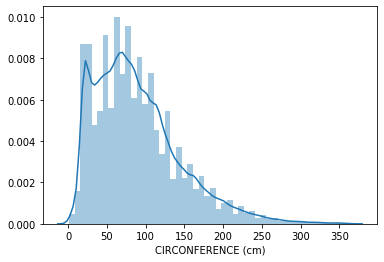

In [81]:
sns.distplot(data['CIRCONFERENCE (cm)'])

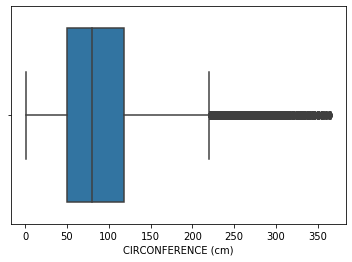

In [82]:
sns.boxplot(x=data['CIRCONFERENCE (cm)'])

> ### HAUTEUR (m)

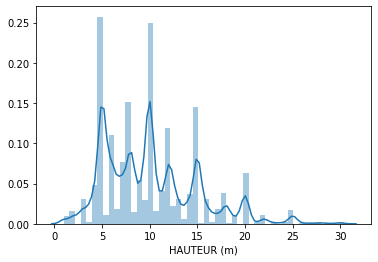

In [83]:
sns.distplot(data['HAUTEUR (m)'])

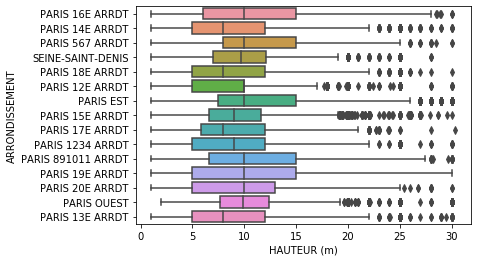

In [94]:
sns.boxplot(x='HAUTEUR (m)', y='ARRONDISSEMENT', data=data)

## Distribution des variables catégorielles
---

* ARRONDISSEMENT
* LIBELLE FRANCAIS
* ESPECE
* STADE DE DEVELOPPEMENT

> ### ARRONDISSEMENT

In [96]:
#sns.barplot(x=data['ARRONDISSEMENT'])

> ### LIBELLE FRANCAIS

> ### ESPECE

> ### STADE DE DEVELOPPEMENT